<a href="https://www.kaggle.com/code/bellevkey/marketing-campaign-analysis?scriptVersionId=123272370" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Marketing Campaign Analysis: Identifying Drivers of Web Purchases  
**![](https://media.istockphoto.com/id/1253822466/vector/seo-analytics-optimization-desktop-dashboard-blue-flat-design.jpg?s=612x612&w=0&k=20&c=OznOihx_irQJY4baEM8wCirn80VS0oiSoTJ1lXcTZEs=)**

# Background of Analysis
Gourmet Delight is an online retailer that specializes in high-quality food and luxury items such as wine, fruit, meat products, fish products, and gold products. The company recently conducted a marketing campaign targeting 2,240 customers. The campaign data includes customer profiles, product preferences, campaign successes/failures, and channel performance and they would like to gain insights into their business operations and improve their marketing strategy by understanding the factors that influence web purchases, identifying the most successful marketing campaigns, understanding the average customer profile, identifying the best performing products, and identifying and addressing underperforming channels.

# Objective of the Analysis
You are tasked to provide answers to the following questions:
* Are there any null values or outliers? How will you handle them?

* What factors are significantly related to the number of web purchases?

* Which marketing campaign was the most successful?

* What does the average customer look like?

* Which products are performing best?

* Which channels are underperforming?

# Importing the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
%matplotlib inline

# Loading the Dataset

In [2]:
marketing_df = pd.read_csv('/kaggle/input/marketing-dataset/marketing_data.csv')
marketing_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,Spain
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,Canada
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,USA
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,Australia
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,Spain


# About the Data


In [3]:
# Load data dictionary file to better understand the data
marketing_dic_df = pd.read_csv('/kaggle/input/marketing-dataset/marketing_data_dictionary.csv')
marketing_dic_df.head(28)

,Field,Description
0,ID,Customer's unique identifier
1,Year_Birth,Customer's birth year
2,Education,Customer's education level
3,Marital_Status,Customer's marital status
4,Income,Customer's yearly household income
5,Kidhome,Number of children in customer's household
6,Teenhome,Number of teenagers in customer's household
7,Dt_Customer,Date of customer's enrollment with the company
8,Recency,Number of days since customer's last purchase
9,MntWines,Amount spent on wine in the last 2 years


# Exploring the data

In [4]:
#check out the number of rows and column
print('Number of Rows and Columns ', marketing_df.shape)

Number of Rows and Columns  (2240, 28)


In [5]:
marketing_df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4    Income              2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

From the info above i noticed the following issues:
1. Income column has whitespace
2. Income column has 24 missing values
3. The column names are in two writing formats


## Working on the issues above:

In [7]:
# issue 1 & 3
#removing whitespace and standadize the column name
marketing_df.columns = ['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income',
       'Kid_home', 'Teen_home', 'Dt_Customer', 'Recency', 'Mnt_Wines',
       'Mnt_Fruits', 'Mnt_Meat_Products', 'Mnt_Fish_Products', 'Mnt_Sweet_Products',
       'Mnt_Gold_Prods', 'Num_Deals_Purchases', 'Num_Web_Purchases',
       'Num_Catalog_Purchases', 'Num_Store_Purchases', 'Num_Web_Visits_Month',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country']
# look at the columns
marketing_df.columns


Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kid_home',
       'Teen_home', 'Dt_Customer', 'Recency', 'Mnt_Wines', 'Mnt_Fruits',
       'Mnt_Meat_Products', 'Mnt_Fish_Products', 'Mnt_Sweet_Products',
       'Mnt_Gold_Prods', 'Num_Deals_Purchases', 'Num_Web_Purchases',
       'Num_Catalog_Purchases', 'Num_Store_Purchases', 'Num_Web_Visits_Month',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

# Question 1
Are there any null values or outliers? How will you handle them?

In [8]:
# issue 2
#dropping the missing values in income since they are less than 1% of the datas
marketing_df.dropna()


,ID,Year_Birth,Education,Marital_Status,Income,Kid_home,Teen_home,Dt_Customer,Recency,Mnt_Wines,...,Num_Store_Purchases,Num_Web_Visits_Month,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,Spain
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,Canada
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,USA
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,Australia
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,Spain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-03-07,99,372,...,11,4,0,0,0,0,0,0,0,USA
2236,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,...,3,8,0,0,0,0,0,0,0,Spain
2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-12-03,99,185,...,5,8,0,0,0,0,0,0,0,Spain
2238,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,267,...,10,3,0,0,0,0,0,0,0,India


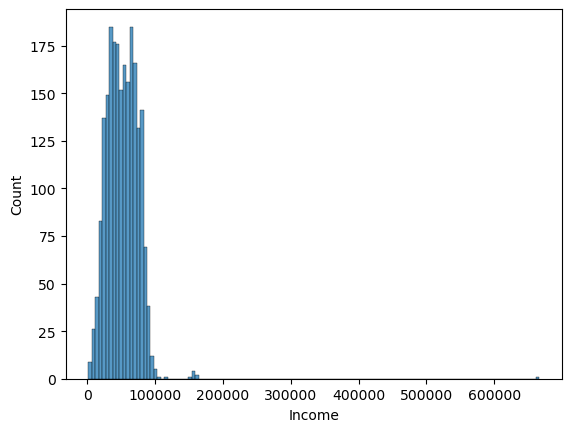

In [9]:
#check out the distribution of income
sns.histplot(data = marketing_df , x = 'Income')
plt.show()

from the histogram above income is between 0 to 200,000 and there seem to be an outlier which may be due to error during data entry, it seem to be just one so I'll be removing it

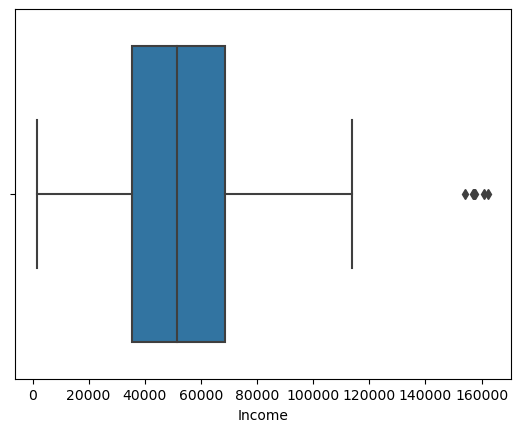

In [10]:
#remove the outlier by removing values that are more than 200,000
marketing_df = marketing_df[marketing_df['Income'] <= 200000]
#view the distribution of income now
sns.boxplot(data = marketing_df, x = 'Income')
plt.show()

From this this distribution income can be grouped into 3 categories: low income, middle income and high income


# Feature Engineering
1. Creating Income level column

In [11]:
#create a new column to group income into
def income_group_func(income):
    if income < 30000:
        return "low income"
    elif income >= 30000 and income < 70000:
        return "middle income"
    else:
        return "high income"

marketing_df["Income_Level"] = marketing_df["Income"].apply(income_group_func)
marketing_df["Income_Level"]


0         high income
1       middle income
2       middle income
3       middle income
4          low income
            ...      
2235    middle income
2236    middle income
2237    middle income
2238    middle income
2239      high income
Name: Income_Level, Length: 2215, dtype: object

2. Creating Age column


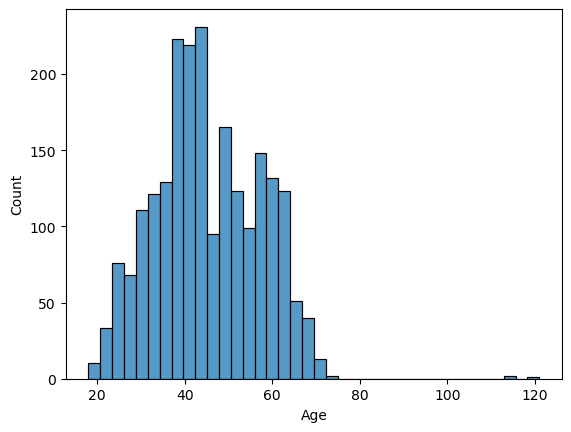

In [12]:
#create another factor 
#which is their ages in 2014 since that is the most recent enrollment date
marketing_df['Age'] = 2014 - marketing_df['Year_Birth'] 
#check out the distribution of the age
sns.histplot(data = marketing_df, x = 'Age')
plt.show()

3. Creating Age group column


In [13]:
# group the age into age brackets
def age_group_func(age):
    if age < 30:
        return "young"
    elif age >= 30 and age < 60:
        return "middle age"
    else:
        return "old"

marketing_df["Age_Group"] = marketing_df["Age"].apply(age_group_func)
marketing_df["Age_Group"]

0       middle age
1       middle age
2       middle age
3       middle age
4            young
           ...    
2235    middle age
2236    middle age
2237    middle age
2238    middle age
2239    middle age
Name: Age_Group, Length: 2215, dtype: object

# Question 2
What factors are significantly related to the number of web purchases?

MSE: 3.3217053456196535
R-squared: 0.5143520542679898
                    feature      coef
20     Marital_Status_Alone  1.329581
26      Marital_Status_YOLO  0.526031
31           Country_Mexico  0.454951
7              AcceptedCmp3  0.434756
6      Num_Web_Visits_Month  0.429406
3       Num_Deals_Purchases  0.260910
5       Num_Store_Purchases  0.254152
10             AcceptedCmp1  0.224060
8              AcceptedCmp4  0.129042
27        Country_Australia  0.092099
12                 Complain  0.072777
18            Education_PhD  0.063145
16     Education_Graduation  0.055761
4     Num_Catalog_Purchases  0.032151
30            Country_India  0.028731
28           Country_Canada  0.011515
13                      Age  0.009010
0                    Income  0.000049
2                 Teen_home -0.011005
15          Education_Basic -0.028440
14       Education_2n Cycle -0.032200
17         Education_Master -0.058266
29          Country_Germany -0.066591
9              AcceptedCmp5 -0.066

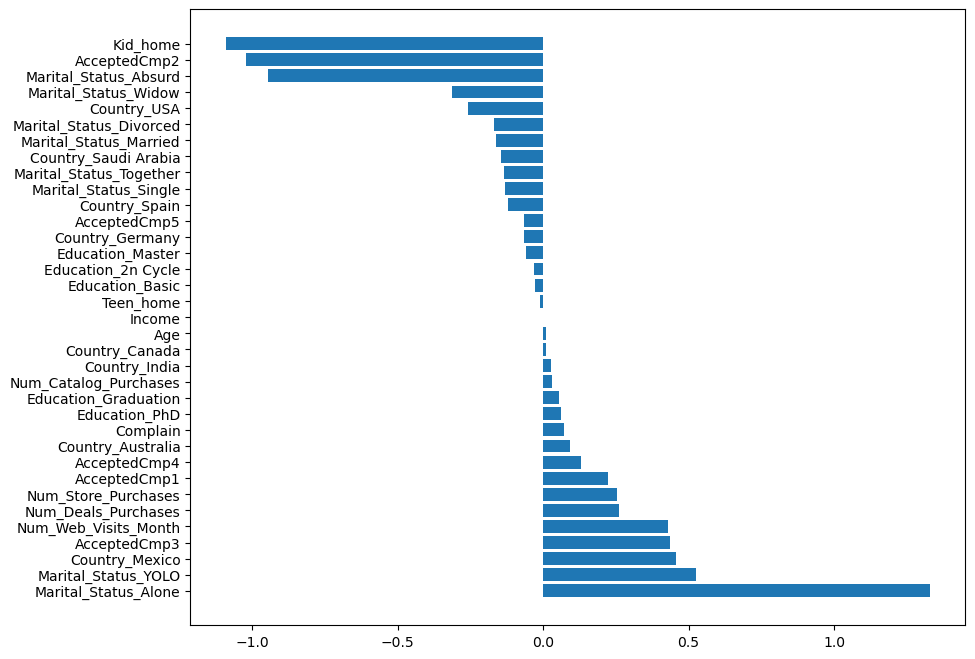

In [14]:
#I'll be using regression model to identify variables that are significantly related to web purchases
#firstly, i'll convert categorical data into numerical variable
#using one-hot encoding to convert categerical data to binary variable
cat_vari = pd.get_dummies(marketing_df, columns = ['Education', 'Marital_Status', 'Country'])
#i'll drop variables that are not relevant
X = cat_vari.drop(['ID', 'Year_Birth', 'Dt_Customer','Response', 'Recency', 'Mnt_Wines',
       'Mnt_Fruits', 'Mnt_Meat_Products', 'Mnt_Fish_Products', 'Mnt_Sweet_Products',
       'Mnt_Gold_Prods', 'Num_Web_Purchases', 'Income_Level', 'Age_Group'], axis = 1) #independent variables
Y = marketing_df['Num_Web_Purchases'] #dependent variable
#split data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
#create model
model = LinearRegression()
#fit model
model.fit(X_train, Y_train)
#make prediction
y_pred = model.predict(X_test)
# evaluate performance
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
print('MSE:', mse)
print('R-squared:', r2)

# view coefficients
coef_df = pd.DataFrame({'feature': X.columns, 'coef': model.coef_}).sort_values('coef', ascending=False)
print(coef_df)

# plot coefficients
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,8))
ax.barh(coef_df['feature'], coef_df['coef'])
plt.show()


this shows the following:
* Customers who live alone tend to have higher web purchase
* Customers from Mexico also have higher web purchase
* Customers who have more kids at home tend to have lower web purchase
* Customer with marital status: Absurd and Widow have low web purchase
* Age and Income has almost not relationship with web purchase

# Question 3
Which marketing campaign was the most successful?

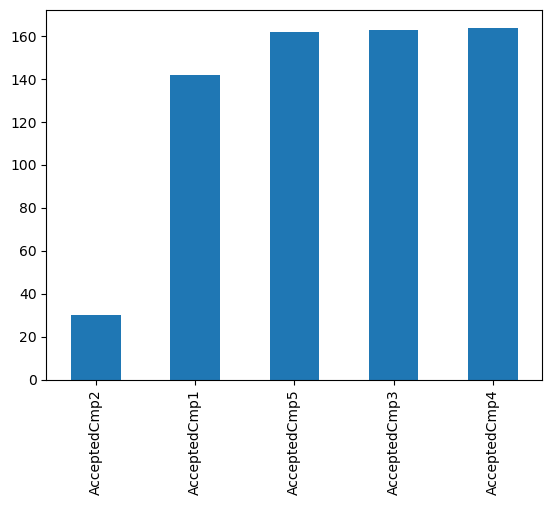

AcceptedCmp2     30
AcceptedCmp1    142
AcceptedCmp5    162
AcceptedCmp3    163
AcceptedCmp4    164
dtype: int64

In [15]:
#sum up the values in each campaign 
campaign_df = marketing_df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']]

campaign_df.sum().sort_values().plot(kind = 'bar')
plt.show()
campaign_df.sum().sort_values()

this shows that the 4th campaign is more successful, 5th and 3th campaign are close and also successful

# Question 4
What does the average customer look like?


In [16]:
#calculate the average age, income, education and family size
avg_age = marketing_df['Age'].mean()
avg_income = marketing_df['Income'].mean()
avg_education = marketing_df['Education'].mode() #using mode to find the most common education
avg_marital_status = marketing_df['Marital_Status'].mode() 
avg_fam_size = marketing_df['Teen_home'].mean() + marketing_df['Kid_home'].mean()
print("The average age of customer is ", round(avg_age) )
print("The average income of customer is ", round(avg_income, 2) )
print("The average family size of customer is ", round(avg_fam_size) )
print("The average education of customer is ", avg_education )
print("The average marital status of customer is ", avg_marital_status )


The average age of customer is  45
The average income of customer is  51969.86
The average family size of customer is  1
The average education of customer is  0    Graduation
dtype: object
The average marital status of customer is  0    Married
dtype: object


The average customer is a 45 years old married graduate with 1 kid and a yearly household income of 51,969.86 


# Question 5
Which products are performing best?

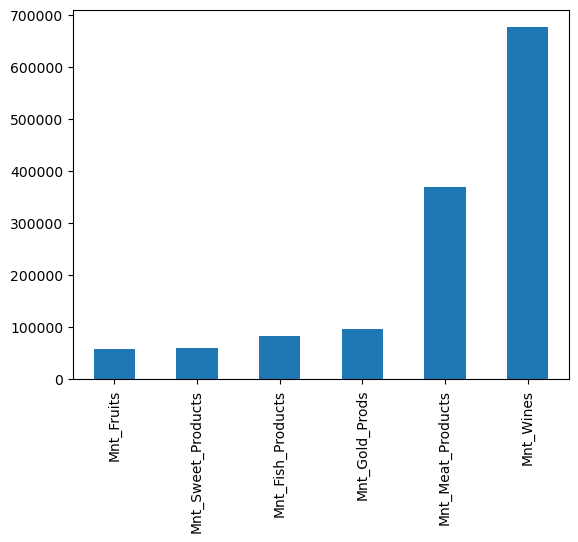

Mnt_Fruits             58391
Mnt_Sweet_Products     59895
Mnt_Fish_Products      83397
Mnt_Gold_Prods         97415
Mnt_Meat_Products     370045
Mnt_Wines             676074
dtype: int64

In [17]:
#sum up the values in each product
product_df = marketing_df[[ 'Mnt_Wines',
       'Mnt_Fruits', 'Mnt_Meat_Products', 'Mnt_Fish_Products', 'Mnt_Sweet_Products',
       'Mnt_Gold_Prods']]
product_df.sum().sort_values().plot(kind = 'bar')
plt.show()
product_df.sum().sort_values()

this shows that wine is the best performing product and next to it is meat

# Question 6
Which channels are underperforming?

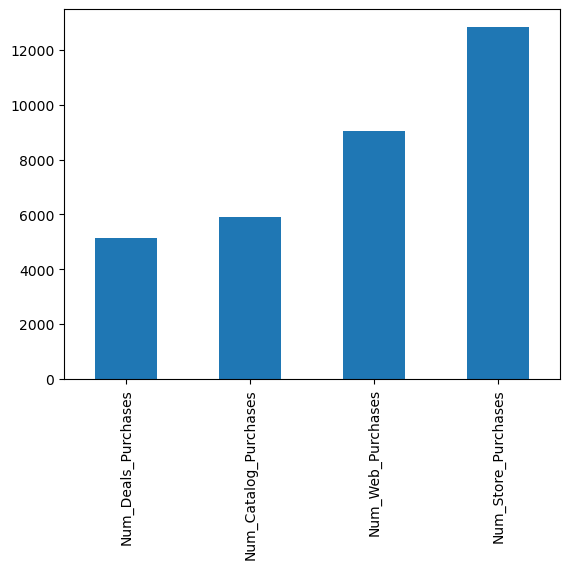

Num_Deals_Purchases       5145
Num_Catalog_Purchases     5918
Num_Web_Purchases         9050
Num_Store_Purchases      12852
dtype: int64

In [18]:
# #sum up the values in each product
channel_df = marketing_df[[ 'Num_Deals_Purchases', 'Num_Web_Purchases',
       'Num_Catalog_Purchases', 'Num_Store_Purchases']]
channel_df.sum().sort_values().plot(kind = 'bar')
plt.show()
channel_df.sum().sort_values()

These results indicate that the Deals channel has the lowest performance, with a total purchase of 5145.

# CONCLUSION
## Key Findings
* Customers who live alone tend to have higher web purchase.
* Customers from Mexico also have higher web purchase.
* Customers who have more kids at home tend to have lower web purchase.
* Customer with marital status: Absurd and Widow have low web purchase.
* Age and Income has almost not relationship with web purchase.
* The 4th campaign is more successful, 5th and 3th campaign are close and also successful.
* The average customer is a 45 years old married graduate with 1 kid and a yearly household income of 51,969.86.
* Wine is the best performing product and next to it is meat.
* the Deals channel has the lowest performance, with a total purchase of 5145.
 
## Recommendations
* Target customers who live alone and customers from Mexico as they tend to have higher web purchases.
* Consider offering promotions or incentives for customers with more kids at home to increase their web purchases.
* Improve marketing campaigns targeted towards customers with marital status: Absurd and Widow, as they tend to have lower web purchases.
* Focus on the 4th campaign as it was the most successful and consider making adjustments to the 3rd and 5th campaigns to increase their effectiveness.
* Consider targeting customers who are around the average customer profile, which is a 45-year-old married graduate with 1 kid and a yearly household income of 51,969.86.
* Continue to focus on offering high-quality wine and meat products, as they are the best performing products.
* Address the underperforming Deals channel by considering making changes to increase its performance or redirecting marketing efforts to higher performing channels.


# NB
* The senario stated above is a fictitious scenario and the company was created for the purpose of the analysis.
* The dataset was gotten from maven data playground
* All analysis were done by me and for my portfolio project